In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
l, xs = symbols("l, xs")

In [38]:
func = log(l ** xs * np.exp(1) ** (-l) / factorial(xs))

In [39]:
func

log(l**xs/(2.71828182845905**l*factorial(xs)))

In [40]:
diff_func = diff(func, l)
diff_func

2.71828182845905**l*(-1.0*l**xs/(2.71828182845905**l*factorial(xs)) + l**xs*xs/(2.71828182845905**l*l*factorial(xs)))*factorial(xs)/l**xs

In [41]:
ll = np.array([0] * 109 + [1] * 65 + [2] * 22 + [3] * 3 + [4])

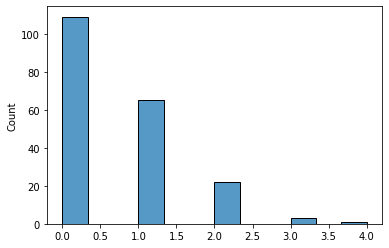

In [42]:
sns.histplot(ll);

In [43]:
from sympy import lambdify
from scipy.optimize import fsolve

In [44]:
diff_func.subs(xs, ll[0])

-1.00000000000000

In [82]:
def prob_pois(xi):
    return diff_func.subs(xs, xi)

In [83]:
arr_func = []
for x in ll:
    arr_func.append(prob_pois(x))

In [73]:
arr_solve = [x for x in arr_solve if x != []]

In [86]:
solve(sum(arr_func), l)

[0.610000000000000]

In [88]:
simplify(sum(arr_func))

-200.0 + 122/l

In [91]:
sum(ll)

122

## Binomial 

In [95]:
k, N, p = symbols("k, N, p")

In [98]:
func = log(binomial(N, k) * p ** k * (1 - p) ** (N - k))

In [101]:
func

log(p**k*(1 - p)**(N - k)*binomial(N, k))

In [103]:
diff_func = func.diff(p)
diff_func

(1 - p)**(-N + k)*(k*p**k*(1 - p)**(N - k)*binomial(N, k)/p + p**k*(1 - p)**(N - k)*(-N + k)*binomial(N, k)/(1 - p))/(p**k*binomial(N, k))

In [111]:
def find_opt(Ni, ki=1):
    return diff_func.subs({N: Ni, k: ki})

In [106]:
data = [8, 12, 7, 6, 12]

In [112]:
arr_func = []
for x in data:
    arr_func.append(find_opt(x, ki=1))

In [115]:
solve(sum(arr_func), p)

[1/9]

## Pois

In [116]:
func = log(N ** k * np.exp(1) ** (-N) / factorial(k))
func

log(N**k/(2.71828182845905**N*factorial(k)))

In [119]:
simplify(func)

log(N**k/(2.71828182845905**N*factorial(k)))

In [117]:
diff_func = func.diff(N)
diff_func

2.71828182845905**N*(-1.0*N**k/(2.71828182845905**N*factorial(k)) + N**k*k/(2.71828182845905**N*N*factorial(k)))*factorial(k)/N**k

In [118]:
simplify(diff_func)

1.0**(N + 1)*(-N + k)/N

In [132]:
arr_func = []
for x in data:
    arr_func.append(prob_pois(x))

In [131]:
def prob_pois(xi):
    return simplify(diff_func).subs(k, xi)

In [134]:
solve(sum(arr_func))

[9.00000000000000]

# Geom

In [142]:
func = log(1/N * (1 - 1/N) ** (k - 1))

In [143]:
func

log((1 - 1/N)**(k - 1)/N)

In [144]:
diff_func = func.diff(N)

In [145]:
def prob_geom(xi):
    return simplify(diff_func).subs(k, xi)

In [146]:
arr_func = []
for x in data:
    arr_func.append(prob_geom(x))

In [147]:
solve(sum(arr_func))

[9]

## Bern

In [111]:
from sympy import factorial as fac

In [4]:
data = np.array([0] * 11 + [1] * 4)
data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [60]:
k, N, p, x1 = symbols("k, N, p, x1")

In [26]:
p = .2, q = .8

In [65]:
func = x1 * log(p) + (1 - x1) * log(1-p)

In [78]:
simplify(func_diff)

(p - x1)/(p*(p - 1))

In [67]:
func_diff = func.diff(p)
func_diff

-(1 - x1)/(1 - p) + x1/p

In [79]:
def find_opt(x):
    return simplify(func_diff.subs(x1, x))

In [80]:
solve(simplify(func_diff.subs(x1, x)), p)

[]

In [81]:
r = []
for x in data:
    r += [find_opt(x)]

In [89]:
round(solve(sum(r))[0], 3)

0.267

In [21]:
n = len(data); k = 4

In [107]:
round(fac(15) / (fac(11) * fac(4)) * .2 ** (15) * .8 ** (11), 5)

0.0

In [124]:
def repl(x):
    return (p ** x1 * (1 - p) ** (1 - x1)).subs({x1: x, p:.2})

In [102]:
r = []
for x in data:
    r += [repl(x)]

In [125]:
round(prod(r), 5)

0.00014

In [105]:
p ** x1 * (1 - p) ** (1 - x1)

p**x1*(1 - p)**(1 - x1)

In [120]:
(binomial(N, k) * p ** (N) * (1 - p) ** (N - k)).subs({N: 15, k: 4, p: .2})

3.84213343210046e-9

In [123]:
from sympy.functions.combinatorial.factorials import binomial

In [3]:
from sympy.functions.elementary.complexes import Abs

In [5]:
w, y, alpha = symbols("w, y, alpha")

In [27]:
func = (w - y) ** 2 + alpha * w
func

alpha*w + (w - y)**2

In [32]:
solve(func.subs({y: 5e-3, alpha: .01}).diff(w))

[0]

In [36]:
func.subs({y: 5e-3, alpha: .01})

0.01*w + (w - 0.005)**2

In [35]:
func.subs({y: 5e-3, alpha: .01}).diff(w)

2*w